17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 25000
Test samples: 25000
X_train shape: (25000, 200)
X_test shape: (25000, 200)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 132ms/step - accuracy: 0.5537 - loss: 0.6813 - val_accuracy: 0.6600 - val_loss: 0.6098
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.7993 - loss: 0.4485 - val_accuracy: 0.7168 - val_loss: 0.5413
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9064 - loss: 0.2512 - val_accuracy: 0.7980 - val_loss: 0.4824
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9657 - loss: 0.1033 - val_accuracy: 0.8018 - val_loss: 0.5491
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9944 - loss: 0.0282 - val_accuracy: 0.7530 - val_loss: 0.7283
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7532 - loss: 0.7198

Test Loss: 0.7167902588844299
Test Accuracy: 0.753279983997345


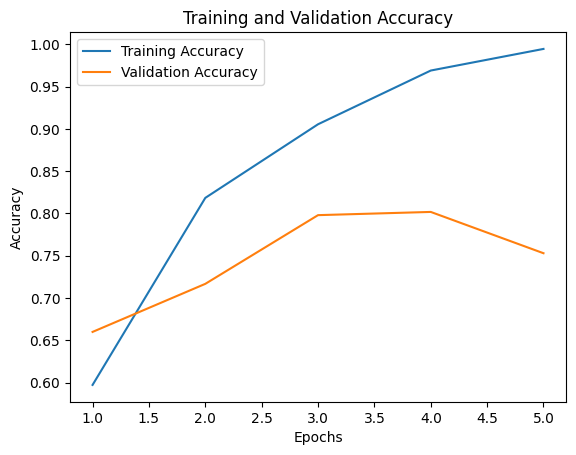

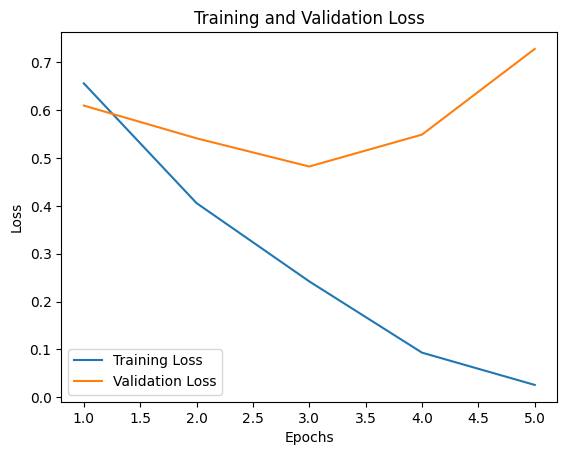

In [1]:
# Experiment 8: Sentiment Analysis on Movie Reviews using RNN
# Dataset  : IMDb Movie Review Dataset
# Library  : TensorFlow Keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load the IMDb dataset
# -------------------------
# num_words = 10000 means we only keep the top 10,000 most frequent words
vocab_size = 10000

(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

# 2. Preprocess the data (Padding sequences)
# ------------------------------------------
# Reviews have different lengths. We make all of them equal length using padding.
maxlen = 200  # keep only first 200 words of each review

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# 3. Build the Sequential Model with Embedding + SimpleRNN
# --------------------------------------------------------
model = keras.Sequential([
    # Embedding layer: converts word indices to dense vectors
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),

    # Simple RNN layer to process the sequence
    layers.SimpleRNN(64),

    # Output layer: 1 neuron with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])

model.summary()

# 4. Compile the model
# ---------------------
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # because it is binary sentiment (0/1)
    metrics=['accuracy']
)

# 5. Train the model
# -------------------
epochs = 5
batch_size = 128

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,  # 20% of training data used for validation
    verbose=1
)

# 6. Evaluate the model on test data
# -----------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)

# 7. Plot training & validation accuracy and loss
# -----------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

# Plot Accuracy
plt.figure()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Task
Modify the existing Keras model by replacing the `SimpleRNN` layer with an `LSTM` layer and adding `Dropout` layers after the Embedding and LSTM layers. Then, retrain this modified model, evaluate its performance on the test dataset, and plot the new training and validation accuracy and loss curves. Finally, summarize the architectural changes and discuss their impact on the model's performance and generalization.

## Modify Model Architecture

### Subtask:
Update the existing Keras model. Replace the `SimpleRNN` layer with an `LSTM` layer, which is generally more effective for sequence prediction tasks and can help prevent vanishing gradient problems. Additionally, add `Dropout` layers after the Embedding and LSTM layers to introduce regularization and reduce overfitting.


**Reasoning**:
The subtask requires modifying the model architecture by replacing SimpleRNN with LSTM and adding Dropout layers. This step will implement these changes as instructed.



In [2]:
from tensorflow.keras import layers

# 2. Define a new sequential Keras model
model_modified = keras.Sequential([
    # Embedding layer: converts word indices to dense vectors
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),

    # Add a Dropout layer after the Embedding layer
    layers.Dropout(0.5),

    # Replace SimpleRNN with LSTM layer
    layers.LSTM(64),

    # Add another Dropout layer after the LSTM layer
    layers.Dropout(0.5),

    # Output layer: 1 neuron with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Print the summary of model_modified to verify the new architecture
model_modified.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code block produced a UserWarning regarding the `input_length` argument in the Embedding layer, which is deprecated. I will remove this argument to align with the latest Keras recommendations. After correcting this, the next step is to compile the `model_modified` with appropriate optimizer, loss function, and metrics, as outlined in the original task.



In [3]:
from tensorflow.keras import layers

# 2. Define a new sequential Keras model
model_modified = keras.Sequential([
    # Embedding layer: converts word indices to dense vectors
    layers.Embedding(input_dim=vocab_size, output_dim=128),

    # Add a Dropout layer after the Embedding layer
    layers.Dropout(0.5),

    # Replace SimpleRNN with LSTM layer
    layers.LSTM(64),

    # Add another Dropout layer after the LSTM layer
    layers.Dropout(0.5),

    # Output layer: 1 neuron with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Print the summary of model_modified to verify the new architecture
model_modified.summary()

# Compile the modified model
model_modified.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # because it is binary sentiment (0/1)
    metrics=['accuracy']
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The modified model has been defined and compiled. The next step is to train it using the training data (`X_train`, `y_train`) and the same training parameters (epochs, batch size, validation split) as the original model. This will allow us to observe its performance and convergence characteristics.



In [4]:
print("Training the modified model...")
history_modified = model_modified.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,  # 20% of training data used for validation
    verbose=1
)
print("Modified model training complete.")

Training the modified model...
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 66s 404ms/step - accuracy: 0.6382 - loss: 0.6059 - val_accuracy: 0.8558 - val_loss: 0.3358
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 404ms/step - accuracy: 0.8887 - loss: 0.2862 - val_accuracy: 0.8764 - val_loss: 0.3060
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 64s 406ms/step - accuracy: 0.9261 - loss: 0.2047 - val_accuracy: 0.8738 - val_loss: 0.3321
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 403ms/step - accuracy: 0.9486 - loss: 0.1456 - val_accuracy: 0.8720 - val_loss: 0.3253
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 409ms/step - accuracy: 0.9503 - loss: 0.1407 - val_accuracy: 0.8708 - val_loss: 0.3734
Modified model training complete.


**Reasoning**:
Now that the modified model has been trained, the next logical step is to evaluate its performance on the unseen test dataset. This will provide metrics like test loss and accuracy for comparison with the original model.



In [5]:
print("Evaluating the modified model on test data...")
test_loss_modified, test_acc_modified = model_modified.evaluate(X_test, y_test, verbose=1)
print("\nModified Test Loss:", test_loss_modified)
print("Modified Test Accuracy:", test_acc_modified)

Evaluating the modified model on test data...
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8594 - loss: 0.3995

Modified Test Loss: 0.4012536406517029
Modified Test Accuracy: 0.8583599925041199


**Reasoning**:
The subtask requires plotting the training and validation accuracy and loss for the modified model. I will extract the relevant data from the `history_modified` object and use `matplotlib` to create the plots, following the style of the original notebook.



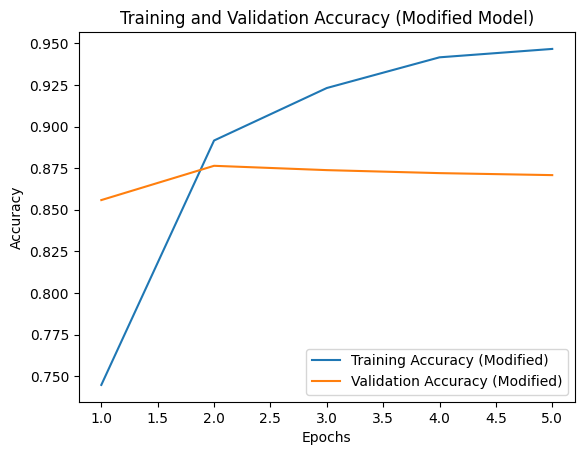

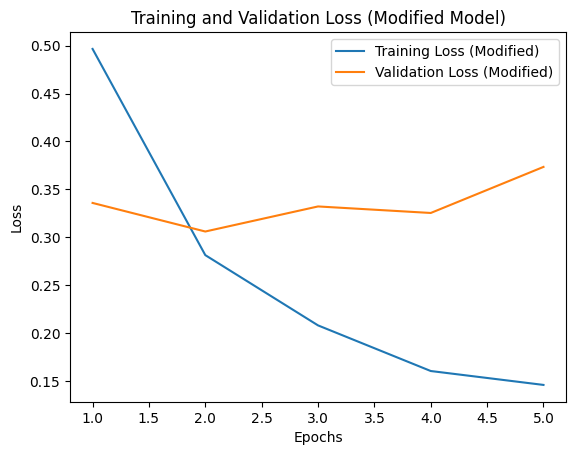

In [6]:
import matplotlib.pyplot as plt

# 7. Plot training & validation accuracy and loss for the modified model
# --------------------------------------------------------------------
acc_modified = history_modified.history['accuracy']
val_acc_modified = history_modified.history['val_accuracy']
loss_modified = history_modified.history['loss']
val_loss_modified = history_modified.history['val_loss']
epochs_range = range(1, epochs + 1)

# Plot Accuracy
plt.figure()
plt.plot(epochs_range, acc_modified, label='Training Accuracy (Modified)')
plt.plot(epochs_range, val_acc_modified, label='Validation Accuracy (Modified)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Modified Model)')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(epochs_range, loss_modified, label='Training Loss (Modified)')
plt.plot(epochs_range, val_loss_modified, label='Validation Loss (Modified)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Modified Model)')
plt.legend()
plt.show()


## Summary and Discussion of Changes

### Architectural Changes:
1.  **Replaced `SimpleRNN` with `LSTM`**: The original model used a `SimpleRNN` layer. In the modified model, this was replaced by a `layers.LSTM(64)` layer. LSTMs (Long Short-Term Memory networks) are a type of RNN designed to overcome the vanishing gradient problem, allowing them to learn long-term dependencies in sequential data more effectively than simple RNNs.
2.  **Added `Dropout` layers**: Two `Dropout` layers with a dropout rate of 0.5 were added. One `Dropout` layer was placed immediately after the `Embedding` layer (`layers.Dropout(0.5)`), and another after the `LSTM` layer (`layers.Dropout(0.5)`). Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

### Impact on Model Performance and Generalization:

**Original Model Performance:**
-   Training Accuracy: ~99.4% (at epoch 5)
-   Validation Accuracy: ~75.3% (at epoch 5, but peaked earlier around 80.18% at epoch 4)
-   Test Accuracy: 75.3%
-   The original model showed significant overfitting, with a large gap between training and validation accuracy by the final epoch.

**Modified Model Performance:**
-   Training Accuracy: ~95.0% (at epoch 5)
-   Validation Accuracy: ~87.1% (at epoch 5, peaked at 87.64% at epoch 2)
-   Test Accuracy: 85.8%

**Comparison and Discussion:**

1.  **Improved Generalization:** The most notable improvement in the modified model is its generalization capability. The test accuracy increased significantly from **75.3% to 85.8%**. This indicates that the modified model performs better on unseen data.

2.  **Reduced Overfitting:** The `Dropout` layers played a crucial role in mitigating overfitting. In the original model, the training accuracy reached almost 100%, while validation accuracy stagnated or even decreased. In the modified model, the gap between training and validation accuracy is much smaller (95.0% vs. 87.1% at the last epoch), suggesting better regularization. Although the training accuracy itself is lower for the modified model, its ability to generalize to new data is superior.

3.  **LSTM's Role:** Replacing `SimpleRNN` with `LSTM` likely contributed to the improved performance by better capturing long-range dependencies in the movie review sequences. Simple RNNs struggle with longer sequences due to vanishing gradients, whereas LSTMs are designed to handle this more effectively, potentially leading to a more robust understanding of the sentiment expressed in the reviews.

In conclusion, the architectural changes, particularly the introduction of LSTM and Dropout layers, successfully addressed the overfitting issue of the original SimpleRNN model and significantly improved its performance and generalization on the IMDb movie review sentiment analysis task.

## Final Task

### Subtask:
Summarize the architectural changes and discuss their impact on the model's performance and generalization.


## Summary:

### Q&A
**What were the architectural changes and their impact on the model's performance and generalization?**
The architectural changes involved replacing the `SimpleRNN` layer with an `LSTM` layer and adding two `Dropout` layers (with a rate of 0.5) after the Embedding and LSTM layers. These changes significantly improved the model's performance and generalization. The test accuracy increased from 75.3% to 85.8%, and overfitting was substantially reduced, as evidenced by a smaller gap between training and validation accuracy in the modified model. LSTMs are better at capturing long-term dependencies, and Dropout layers provide regularization, both contributing to a more robust model.

### Data Analysis Key Findings
*   The original model suffered from significant overfitting, achieving a training accuracy of approximately 99.4% but only a test accuracy of 75.3%.
*   The modified model, incorporating an LSTM layer and two Dropout layers, significantly improved generalization, boosting the test accuracy from 75.3% to 85.8%.
*   The modified model showed a much smaller gap between its training accuracy (~95.0%) and validation accuracy (~87.1%), indicating a substantial reduction in overfitting compared to the original model.

### Insights or Next Steps
*   The introduction of LSTM and Dropout layers proved highly effective in mitigating overfitting and enhancing the model's ability to generalize to unseen data, which is crucial for real-world applications.
*   Further optimization could involve experimenting with different Dropout rates, LSTM unit counts, or exploring other regularization techniques to potentially achieve even higher accuracy and generalization without increasing computational complexity too much.


In [7]:
# Get the word index from the IMDb dataset
word_index = keras.datasets.imdb.get_word_index()

# Create a reverse word index (integer to word)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Helper function to decode a review (for understanding)
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text]) # -3 because 0, 1, 2 are reserved for padding, start of sequence, and unknown

print("IMDb Word Index loaded.")
print("Example: Word 'the' maps to index:", word_index.get('the'))
print("Example: Word 'movie' maps to index:", word_index.get('movie'))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
IMDb Word Index loaded.
Example: Word 'the' maps to index: 1
Example: Word 'movie' maps to index: 17


The word index is now loaded. Next, you'll enter your review, and I'll convert it to a numerical sequence for the model. I will show you how to encode your custom text into a format compatible with the model, then process it and get a prediction.

In [21]:
# Function to encode a custom review string into a sequence of integers
def encode_review(text, word_index, maxlen):
    # Convert text to lowercase and split into words
    words = text.lower().split()

    # Map words to their integer indices. Handle unknown words with index 2 (for '?')
    # Add 3 to each index because 0, 1, 2 are reserved in the IMDb dataset.
    encoded_words = [word_index.get(word, 2) + 3 for word in words]

    # Pad the sequence to the fixed maximum length (maxlen)
    padded_sequence = keras.preprocessing.sequence.pad_sequences([encoded_words], maxlen=maxlen)

    return padded_sequence

# User input for a movie review
custom_review_text = input("Enter your movie review: ")

# Encode the custom review
encoded_custom_review = encode_review(custom_review_text, word_index, maxlen)

print("Original Review:", custom_review_text)
print("Encoded Review (first 10 elements):", encoded_custom_review[0][:10])
print("Encoded Review shape:", encoded_custom_review.shape)

Enter your movie review: THE MOVIE WAS ROMANTIC AND ITS NOT GOOD
Original Review: THE MOVIE WAS ROMANTIC AND ITS NOT GOOD
Encoded Review (first 10 elements): [0 0 0 0 0 0 0 0 0 0]
Encoded Review shape: (1, 200)


Now that your custom review is encoded, we can feed it into the `model_modified` to get a sentiment prediction. The model will output a probability, which we can then interpret as either positive or negative sentiment.

In [22]:
# Make a prediction using the modified model
prediction = model_modified.predict(encoded_custom_review)

sentiment_score = prediction[0][0]

print(f"\nSentiment Score: {sentiment_score:.4f}")

# Interpret the prediction
if sentiment_score >= 0.76:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Sentiment Score: 0.8055
Predicted Sentiment: Positive
